# Entendimiento del problema

## Homicidios en la ciudad de Cali registrados desde el año 2004 hasta el año 2021.

### Contexto del problema.

La ciudad de Cali en los últimos años se ha configurado como una de las ciudades más violentas de Colombia y del mundo.

Las implicaciones que han llevado a Cali a constituirse de esta forma han sido varias razones y a su vez muy complejas. Fenómenos como el desplazamiento forzado, la pobreza, falta de oportunidades o desigualdad social, pueden ser razones que hayan transformado a la sociedad caleña a como la conocemos hoy en día.

### Estudio.
Debido a lo anterior se pretende analizar cuales son los barrios de Cali en donde más se han presentado homicidios a lo largo del periodo 2004 - 2021. Además, se quiere analizar en que jornada del día (Mañana, Tarde, Noche o Madrugada) y día de la semana se presentan homicidios con una mayor frecuencia, cuál se su causa(Convivencia o Delincuencia) y si el homicidio fue cometido con arma blanca o de fuego.

Lo anterior es importante para entender como se configuran los acotores sociales que hay detrás de estos homicidios.

Por lo tanto, el objetivo principal de este análisis es entender la constitución social que se ha formado detrás de estos homicidios y partir de esto generar posibles hipótesis y soluciones sobre la razón del porqué se generan estos homicidios y alternativas para evitarlos.


### Importamos librerias y base de datos

In [2]:
!pip install -U plotly
!pip install -U kaleido # Necesitamos esta librería para exportar las visualizaciones como imágenes estáticas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 68.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00


In [3]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np
from scipy import stats
import scipy
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [4]:
#Importamos las base de datos y usamos set_option para mostrar todas las columnas
pd.set_option("display.max_columns", None)
data = pd.read_excel("base homicidios 2004-2022_05_07.xls")

### Analizamos las variables de la base de datos

Primero comenzaremos importanto la base de datos "base homicidios 2004-2022_05_07.xls" para hacer un análisis general de todas las varibles con las que contamos y posteriormente escoger las variables a utilizar para cumplir con nuestros objetivos.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27751 entries, 0 to 27750
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   no                              27751 non-null  int64         
 1   semana                          27751 non-null  int64         
 2   identificador                   27751 non-null  int64         
 3   spoa                            27505 non-null  object        
 4   spoa_completo                   7710 non-null   object        
 5   direccion                       27739 non-null  object        
 6   barrio                          27749 non-null  object        
 7   com                             27751 non-null  int64         
 8   idcombar                        27751 non-null  int64         
 9   cuadrante                       8952 non-null   object        
 10  tipo_de_arma                    27751 non-null  object        
 11  NO

Como podemos observar, la base de datos cuenta con 52 variables, las cuales han sido recolectadas y procesadas por la institución de policias en la ciudad de Cali. Estas variables tienen como objetivo principal recolectar la mayor información posible de cada homicidio durante el periodo 2004-2022.

Podemos observar información importante como la fecha del homicidio; los lugares exactos donde ocurrieron; el día de la semana; la jornada; el tipo de arma o la razón por la cual sucedió el homicidio.

In [ ]:
data.describe()

,no,semana,identificador,com,idcombar,EDAD,fechao,est28xrangohora,est32xdianoche,diasanio,comuna_residencia,x,y,procedimientofuerzapublica,clasificacion,estratoplaneacion,semanaexcel,semanalundom,semanaconsecutivoexcel,semanaconsecutivolundom,finsemanaconsecutivo
count,27751.000000,27751.000000,27751.000000,27751.000000,27751.000000,27669.000000,27751.000000,27751.000000,27751.000000,27751.000000,27751.000000,23041.000000,23041.000000,0.0,2.774700e+04,27628.000000,27751.000000,27751.000000,27751.000000,27751.000000,14040.000000
mean,14020.043134,26.789125,50250.152895,13.339736,1357.447083,29.858614,2011.889806,5.253793,4.855465,183.483370,5.680048,-72.814919,3.104458,NaN,2.301096e+06,2.166498,27.104861,27.050521,1012.972037,1012.751901,1008.833120
std,8084.294508,15.299661,16715.715317,8.564500,860.244666,12.119297,5.114815,2.396044,1.930927,107.084627,14.007995,16.415690,3.709673,NaN,1.260887e+07,1.651618,15.293834,15.303535,267.020974,267.022192,267.346741
min,1.000000,1.000000,145.000000,0.000000,0.000000,0.000000,2004.000000,1.000000,1.000000,1.000000,0.000000,-76.653473,-76.631010,NaN,0.000000e+00,1.000000,1.000000,1.000000,575.000000,575.000000,575.000000
25%,7028.500000,14.000000,41664.500000,8.000000,813.000000,21.000000,2008.000000,3.000000,3.000000,92.000000,0.000000,-76.523313,3.410627,NaN,0.000000e+00,1.000000,14.000000,14.000000,791.000000,791.000000,788.000000
50%,14030.000000,27.000000,51581.000000,13.000000,1390.000000,27.000000,2012.000000,6.000000,5.000000,182.000000,0.000000,-76.501350,3.423936,NaN,0.000000e+00,2.000000,27.000000,27.000000,1001.000000,1001.000000,992.000000
75%,21019.500000,40.000000,63673.500000,16.000000,1604.000000,36.000000,2016.000000,7.000000,6.000000,276.000000,8.000000,-76.484331,3.442486,NaN,1.000000e+03,3.000000,40.000000,40.000000,1220.000000,1220.000000,1217.000000
max,28022.000000,53.000000,74184.000000,99.000000,9999.000000,100.000000,2022.000000,8.000000,8.000000,366.000000,99.000000,3.520430,3.523768,NaN,1.110100e+08,99.000000,53.000000,54.000000,1532.000000,1532.000000,1532.000000


Aunque muchos datos son de tipo númerico en la base de datos, la mayoría de ellos no son metricos si no categóricos. Por lo tanto, llevar a cabo un análisis de medias o desviación estandar resulta improductivo.

##Variables a uilizar.

Para cumplir los objetivos del proyecto se ha tomado la decisión metodológica de seleccionar ciertas variables de nuestra base de datos original para poder encontrar hallazgos sobre posibles causas de los homicidios en Cali.

Para realizar lo hanterior se han seleccionado las siguientes variables, ya que son las que representas los datos necesarios para cumplir con los objetivos del proyecto.

*   **fechah**: Año mes y día del homicidio
*   **fechao**: Año del homicidio
*   **diasem**: Día de la semana del homicidio
*   **fh8**: Jornada del día del homicidio
*   **tipo_de_arma**: Arma con la que se realizó el homicidio
*   **barrio**: Barrio en donde ocurrió el homicidio
*   **EDAD**: Edad del homicida
*   **tipo_violencia**: Razón por la que ocurrió el homicidio
*   **escolaridad**: Nivel de estudios alcanzados por el homicida
*   **SEXO**: Genero del o la homicida






In [5]:
#Creamos una nueva base de datos con las variables escogidas previamente de la base de datos original
df = data.loc[:,["fechao","diasem","fh8","tipo_de_arma","barrio","EDAD","tipo_violencia","escolaridad"
                  , "SEXO"]]
df.head()

,fechao,diasem,fh8,tipo_de_arma,barrio,EDAD,tipo_violencia,escolaridad,SEXO
0,2004,JUEVES,MADRUGADA,CORTOPUNZANTE,LOS ANDES B - LA RIVIERA,29.0,OTRO,SIN ESTABLECER,M
1,2004,JUEVES,MADRUGADA,ARMA DE FUEGO,EL VERGEL,42.0,CONVIVENCIA,SIN ESTABLECER,F
2,2004,JUEVES,MADRUGADA,ARMA DE FUEGO,SILOE,16.0,CONVIVENCIA,SIN ESTABLECER,M
3,2004,JUEVES,MADRUGADA,ARMA DE FUEGO,ANTONIO NARIÑO,35.0,CONVIVENCIA,SIN ESTABLECER,M
4,2004,JUEVES,MADRUGADA,CORTOPUNZANTE,EL RETIRO,22.0,CONVIVENCIA,SIN ESTABLECER,M


In [ ]:
#Aquí se puede ir formando una idea del tipo de dato de cada variable y ver si quizás hay datos faltantes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27751 entries, 0 to 27750
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fechah          27751 non-null  datetime64[ns]
 1   fechao          27751 non-null  int64         
 2   diasem          27751 non-null  object        
 3   fh8             27751 non-null  object        
 4   tipo_de_arma    27751 non-null  object        
 5   barrio          27749 non-null  object        
 6   EDAD            27669 non-null  float64       
 7   tipo_violencia  27751 non-null  object        
 8   escolaridad     27751 non-null  object        
 9   SEXO            27747 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 2.1+ MB


In [ ]:
#Hacer intervalo de confianza para la media de la edad
df.describe()

,fechao,EDAD
count,27751.000000,27669.000000
mean,2011.889806,29.858614
std,5.114815,12.119297
min,2004.000000,0.000000
25%,2008.000000,21.000000
50%,2012.000000,27.000000
75%,2016.000000,36.000000
max,2022.000000,100.000000


In [30]:
df.shape

(27751, 9)

En nuestra nueva base de dato "df", formada a partir de variables de la base de datos original, podemos observar que se compone de 27751 observaciones y 9 variables. También podemos observar que algunas variables tienen datos faltantes.

Cuando realizamos la descripción de nuestra base de datos "df", solamente podemos observar que la edad promedio de las personas que cometieron un homicidio en la ciudad de Cali es de 30 años redondeado.

### Datos faltantes

Ahora verificaremos la cantidad de datos faltantes por cada variable que presenta esta condición.



*   Barrio
*   EDAD
*   SEXO




In [35]:
barrio = df["barrio"].isna().sum()
edad = df["EDAD"].isna().sum()
sexo = df["SEXO"].isna().sum()

print("Para la variable 'barrio', se han econtrado", barrio, "datos faltantes", "\n"
      "Para la variable 'edad', se han econtrado", edad, "datos faltantes", "\n"
      "Para la variable 'sexo', se han econtrado", sexo, "datos faltantes")

Para la variable 'barrio', se han econtrado 2 datos faltantes 
Para la variable 'edad', se han econtrado 82 datos faltantes 
Para la variable 'sexo', se han econtrado 4 datos faltantes


Para tratar los datos faltantes, en esta ocasión se ha decidido eliminar los datos faltantes. Esto se debe a que los datos faltantes son muy pocos en comparación a la cantidad de observaciones que tenemos, e imputar los datos en este tipo de datos puede afectar bastente al resultado.

In [36]:
df.dropna(subset=['barrio'], inplace=True)
df.dropna(subset=['EDAD'], inplace=True)
df.dropna(subset=['SEXO'], inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27664 entries, 0 to 27750
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fechao          27664 non-null  int64  
 1   diasem          27664 non-null  object 
 2   fh8             27664 non-null  object 
 3   tipo_de_arma    27664 non-null  object 
 4   barrio          27664 non-null  object 
 5   EDAD            27664 non-null  float64
 6   tipo_violencia  27664 non-null  object 
 7   escolaridad     27664 non-null  object 
 8   SEXO            27664 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.1+ MB


Como podemos observar, nuestra nueva base de datos ahora cuenta con 27664 observaciones.


### Frecuencias.

Debido al tipo de datos con los cuales se cuenta para este estudio, realizaremos las frecuencias de las variables como método de estadistica descriptiva.

Lo que se pretende al realizar las frecuencias de las variables es observar los datos mínimos y máximos, y a su vez obtener las medias de estas frecuencias, para posteriormente presentar los resultados en gráficos que nos ayuden a enteder de mejor forma los datos.

In [38]:
df.fechao.value_counts()

2004    2130
2013    1941
2012    1834
2011    1828
2010    1820
2009    1770
2005    1558
2014    1543
2006    1514
2007    1492
2008    1440
2015    1354
2016    1287
2017    1236
2021    1223
2018    1152
2019    1115
2020    1071
2022     356
Name: fechao, dtype: int64

In [39]:
fig = px.bar(df,
             x = df.fechao.value_counts().index,
             y = df.fechao.value_counts(),
             title = "Número de homicidios por año")

fig.update_xaxes(title_text='Año')

fig.update_yaxes(title_text='Número de homicidios')

fig.show()


 A partir de las frecuencias de los homicidios para todos los años y el gráfico de barras podemos observar que el año con más homicidios para la ciudad de Cali es en el 2004. Además de esto observamos que hay una disminución considerable de homicidios que se mantiene desde el año 2014 hasta el año 2020.

 Lo anterior es importante, porque se puede investigar que tipo de **políticas públicas** fueron empleadas en ese periodo para contrarrestar los homicidios en la ciudad de Cali.

In [11]:
df.diasem.value_counts()

DOMINGO      6109
SABADO       4268
VIERNES      3663
LUNES        3550
MARTES       3417
JUEVES       3391
MIERCOLES    3353
Name: diasem, dtype: int64

In [49]:
fig = px.bar(df,
             x = df.diasem.value_counts().index,
             y = df.diasem.value_counts(),
             title = "Número de homicidios por día")

fig.update_xaxes(title_text='Día')

fig.update_yaxes(title_text='Número de homicidios')

fig.show()

Podemos observar que a lo largo de todo los años, el día con más homicidios en la ciudad de Cali fue el domingo. Lo anterior no es una casualidad y presenta un patrón de comportamiento que puede resultar fructífero estudiar. Lo anterior puede implicar que un día domingo, al ser un día de esparcimiento social, puede llevar a una mayor friccion social; lo cual conduce a mayores problemas de convivencia o una mayor oportunidad para los delincuentes de realizar actividades ilegales como hurtos que pueden conducir a homicidios.

In [ ]:
df.fh8.value_counts()

NOCHE        11792
TARDE         6396
MADRUGADA     5556
MAÑANA        4007
Name: fh8, dtype: int64

In [50]:
fig = px.bar(df,
             x = df.fh8.value_counts().index,
             y = df.fh8.value_counts(),
             title = "Número de homicidios por jornada")

fig.update_xaxes(title_text='Jornada')

fig.update_yaxes(title_text='Número de homicidios')

fig.show()

Podemos observar que la jornada en la que se presentan más homicidios a lo largo de los años es en la noche. De nuevo, se puede repetir el fenómeno de la variable anterior ("diasem") ya que esto puede presentarse debido a las conductas sociales. Es decir, al haber una mayor interacción social, puede repercutir, en una sociedad como la caleña, en el aumento de homicidios debido a la intolerancia y altos indices de delincuencia.

In [ ]:
df.tipo_de_arma.value_counts()

ARMA DE FUEGO    23536
CORTOPUNZANTE     3424
OTRAS ARMAS        791
Name: tipo_de_arma, dtype: int64

In [51]:
fig = px.bar(df,
             x = df.tipo_de_arma.value_counts().index,
             y = df.tipo_de_arma.value_counts(),
             title = "Número de homicidios por arma empleada")

fig.update_xaxes(title_text='Arma empleada')

fig.update_yaxes(title_text='Número de homicidios')

fig.show()

Se puede observar que pon una gran diferencia, el elemento más usado en los homicidios de la ciudad de cali durante el periodo 2004 - 2021, son las armas de juego.

Lo anterior tiene un gran importancia, ya que en Colombia el porte de armas de fuego por un civil es ilegal. Solo pueden hacer uso de ellas, las instituciones de defensa colombianas y organizaciones de protección, como los servicios de escolta. Esto significa que en Cali hay una gran movilidad de armas ilegales que rondan las calles. Entre ellas se encuentran armas producidas por la indumil y armas hechizas.

Es así como esto puede ser un gran foco al cual se le debería prestar atención y generar planes de acción para extraer todas estas armas de las calles por un lado, y por el otro generar estrategias que impidan la llegada de armas a manos de las personas.

In [42]:
#Número de barrios en total.
df.barrio.nunique()

420

In [43]:
px.histogram(df,
             x = 'barrio')

In [49]:
df.barrio.value_counts().head(20).sum()

8092

In [52]:
# porcentaje de los datos en 20 barrios

porcentaje = (df.barrio.value_counts().head(20).sum() * 100)/27664
print("El porcentaje que recojen los 20 barrios de datos es: ", porcentaje,"%")

El porcentaje que recojen los 20 barrios de datos es:  29.251012145748987 %


Debido a que tenemos 420 barrios, y con 20 barrios recogemos un 29% de los datos, se ha tomado la decisión metodológica de realizar el análisis de frecuencia solo para los 20 barrios con más homicidios en la ciudad de Cali.



In [48]:
df.barrio.value_counts().head(20)

SILOE                       612
MANUELA BELTRÁN             581
MOJICA                      576
EL RETIRO                   478
POTRERO GRANDE              441
EL VERGEL                   436
TERRÓN COLORADO             435
LOS COMUNEROS I             417
MARIANO RAMOS               412
ALFONSO BONILLA ARAGÓN      402
JOSE MANUEL MARROQUÍN II    392
ANTONIO NARIÑO              378
SUCRE                       368
CIUDADELA FLORALIA          366
CIUDAD CÓRDOBA              325
EL POBLADO II               313
SANTA ELENA                 310
EL RODEO                    291
LLERAS CAMARGO              289
NUEVA FLORESTA              270
Name: barrio, dtype: int64

In [55]:
fig = px.bar(df,
             x = df.barrio.value_counts().head(20).index,
             y = df.barrio.value_counts().head(20),
             title = "Número de homicidios del top 20 de barrios con más homicidios")

fig.update_xaxes(title_text='Barrio')

fig.update_yaxes(title_text='Número de homicidios')

fig.show()

Sin duda alguna, se puede observar que los tres primero barrios presentan una diferencia considerable en comparación a los últimos tres barrios con menos homicidios. Más sin embargo, la cantidad de homicidios que presentan todos estos barrios a lo largo del tiempo no son pocos.

Esta información puede ser importante para tomar medidas preventivas y politícas públicas distintas y focalizadas en cada barrio, con el objetivo de tratar el problema no como uno general, si no al contrario, individualizarlo y entender que cada barrio presenta una heterogeneidad de características.

In [31]:
df.EDAD.value_counts()

29.85861433373089

In [57]:
fig = px.bar(df,
             x = df.EDAD.value_counts().index,
             y = df.EDAD.value_counts(),
             title = "Edad de las personas que cometieron el homicidio")

fig.update_xaxes(title_text='Edad')

fig.update_yaxes(title_text='Número de homicidios')

fig.show()

Podemos observar que los homicidios realizados se concentran en personas de una edad joven. Entre los 17 y 26 años. Esto es verdaderamente preocupante, pero a la vez también refleja la importancia de una **política pública** enfocada en los jovenes, una política incluyente y general. Se debe pensar en medidas efectivas que le otorguen a los jovenes una oportunidad distinta para salir de los contextos de violencia en los que se ven involucrados.

In [56]:
df.tipo_violencia.value_counts()

DELINCUENCIA    14765
CONVIVENCIA      7024
OTRO             5875
Name: tipo_violencia, dtype: int64

In [57]:
fig = px.bar(df,
             x = df.tipo_violencia.value_counts().index,
             y = df.tipo_violencia.value_counts(),
             title = "Número de homicidios por cada tipo de violencia")

fig.update_xaxes(title_text='Tipo de violencia')

fig.update_yaxes(title_text='Número de homicidios')

fig.show()

In [58]:
px.pie(df, # DataFrame. Dataset de propinas "tips".
       names = df.tipo_violencia.value_counts().index,    # Categorías usadas para distinguir cada sección. (Día de la semana)
       values = df.tipo_violencia.value_counts(),   # Valores representados por cada sección a partir del tamaño del ángulo. (Total de propinas)
       hole = 0.3,        # Proporción del agujero del centro.
       title = "Proporción de tipo de violencia por cada homicidio")

Es claro que la mayor parte de homicidios es otorgado a la delincuencia, pero es importante resaltar 7024 homicidos que equivalen a un 25.4% es por causas de convivencia. Un dato aterrador, ya que 7024 personas han muerto por problemas en la sociedad caleña para convivir. Esto lanza un llamado a las autoridades e instituciones pertinentes de que se necesita urgentemente medidas que se enfoquen en mejorar la convivencia, la cultura y la tolerancia. Aprender a convivir es parte fundamental de una sociedad.

Por otro lado, la delincuencia es un problema que no se debe ver de una manera uniforme. La delincuencia es un problema de multiples aristas, y para atacarlo se necesita una solución integrada por multiples soluciones.

In [59]:
df.escolaridad.value_counts()

SIN ESTABLECER              16452
SECUNDARIA                   6836
PRIMARIA                     3090
SECUNDARIA INCOMPLETA         446
UNIVERSITARIO                 353
TECNOLOGO                     205
PRIMARIA INCOMPLETA           131
ILETRADO                       88
UNIVERSITARIO INCOMPLETO       59
ESPECIALIZADO                   4
Name: escolaridad, dtype: int64

In [60]:
fig = px.bar(df,
             x = df.escolaridad.value_counts().index,
             y = df.escolaridad.value_counts(),
             title = "Escolaridad alcanzada por las personas que cometieron el homicidio")

fig.update_xaxes(title_text='Escolaridad')

fig.update_yaxes(title_text='Número de homicidios')

fig.show()

Podemos observar que casi diez mil homicidios se encuentran entre personas que alcanzarón un nivel de escolaridad de secundaria o primaria. Es algo muy relevante ya que como podemos observar, el nivel de homicidios en personas que alcanzarón un nivel educativo tecnologico en adelante es muy bajo en comparación a al nivel de homicidios cometidos por personas que alcanzarón secundaria y primaria.

In [ ]:
df.SEXO.value_counts()

M    25955
F     1792
Name: SEXO, dtype: int64

In [61]:
fig = px.bar(df,
             x = df.SEXO.value_counts().index,
             y = df.SEXO.value_counts(),
             title = "Género de las personas que cometieron el homicidio")

fig.update_xaxes(title_text='Género')

fig.update_yaxes(title_text='Número de homicidios')

fig.show()

In [10]:
px.pie(df, # DataFrame. Dataset de propinas "tips".
       names = df.SEXO.value_counts().index,    # Categorías usadas para distinguir cada sección. (Día de la semana)
       values = df.SEXO.value_counts(),   # Valores representados por cada sección a partir del tamaño del ángulo. (Total de propinas)
       hole = 0.3,
       title = "Proporción del genero de personas que cometieron un homicidio"# Proporción del agujero del centro.
       )

El 93.5% de homicidios fuerón realizados por hombres. Algo que corrobora como está configurada nuestra sociedad, una en la cual las pandillas, bandas organizadas o ladrones, están configuradas por hombres en su mayoría. Esto tiene unas implicaciones sociales muy profundas, y por lo tanto es importante la creación de **políticas públicas** basadas en **género**.

### Media, Min Max e intervalos de confiaza.

A continuación se quiere hallar las medias y los datos mínimos y máximos de las frecuencias de algunas variables

In [10]:
limite_inferior, limite_superior = sm.stats.DescrStatsW(df.fechao.value_counts()).tconfint_mean(alpha = 0.05)
mean = df.fechao.value_counts().mean()
min = df.fechao.value_counts().min()
max = df.fechao.value_counts().max()
idmin = df.fechao.value_counts().idxmin()
idmax = df.fechao.value_counts().idxmax()

print("El promedio de homicidios por año es: ",mean, "\n"
      "Con un intervalo de confianza al 95%, de", limite_inferior, "homicidios y ", "\n"
      "", limite_superior, "homicidios por año", "\n"
      "El mínimo de homicidios es: ",min,", para el año:", idmin, "\n"
      "El máximo de homicidios es:", max,", para el año:", idmax)

El promedio de homicidios por año es:  1460.578947368421 
Con un intervalo de confianza al 95%, de 1264.6985939465876 homicidios y  
 1656.4593007902545 homicidios por año 
El mínimo de homicidios es:  356 , para el año: 2022 
El máximo de homicidios es: 2143 , para el año: 2004


In [9]:
limite_inferior, limite_superior = sm.stats.DescrStatsW(df.diasem.value_counts()).tconfint_mean(alpha = 0.05)
mean = df.diasem.value_counts().mean()
min = df.diasem.value_counts().min()
max = df.diasem.value_counts().max()
idmin = df.diasem.value_counts().idxmin()
idmax = df.diasem.value_counts().idxmax()

print("El promedio de homicidios por día para todos los años es: ",mean, "\n"
      "Con un intervalo de confianza al 95%, de", limite_inferior, "homicidios y ", "\n"
      "",limite_superior, "homicidios por día para todos los años", "\n"
      "El mínimo de homicidios es: ",min,", para el día:", idmin, "\n"
      "El máximo de homicidios es:", max,", para el día:", idmax)

El promedio de homicidios por día para todos los años es:  3964.4285714285716 
Con un intervalo de confianza al 95%, de 3042.9572904067168 homicidios y  
 4885.899852450427 homicidios por día para todos los años 
El mínimo de homicidios es:  3353 , para el día: MIERCOLES 
El máximo de homicidios es: 6109 , para el día: DOMINGO


In [8]:
limite_inferior, limite_superior = sm.stats.DescrStatsW(df.fh8.value_counts()).tconfint_mean(alpha = 0.05)
mean = df.fh8.value_counts().mean()
min = df.fh8.value_counts().min()
max = df.fh8.value_counts().max()
idmin = df.fh8.value_counts().idxmin()
idmax = df.fh8.value_counts().idxmax()

print("El promedio de homicidios por jornada para todos los años es: ",mean, "\n"
      "Con un intervalo de confianza al 95%, de", limite_inferior, "homicidios y ", "\n"
      "", limite_superior, "homicidios por jornada para todos los años", "\n"
      "El mínimo de homicidios es: ",min,", para la jornada:", idmin, "\n"
      "El máximo de homicidios es:", max,", para la jornada:", idmax)

El promedio de homicidios por jornada para todos los años es:  6937.75 
Con un intervalo de confianza al 95%, de 1552.941389365431 homicidios y  
 12322.558610634569 homicidios por jornada para todos los años 
El mínimo de homicidios es:  4007 , para la jornada: MAÑANA 
El máximo de homicidios es: 11792 , para la jornada: NOCHE


In [22]:
# No se aplica media
min = df.tipo_de_arma.value_counts().min()
max = df.tipo_de_arma.value_counts().max()
idmin = df.tipo_de_arma.value_counts().idxmin()
idmax = df.tipo_de_arma.value_counts().idxmax()

print("El mínimo de homicidios es: ",min,", empleando:", idmin, "\n"
      "El máximo de homicidios es:", max,", empleando:", idmax)


El mínimo de homicidios es:  791 , empleando: OTRAS ARMAS 
El máximo de homicidios es: 23536 , empleando: ARMA DE FUEGO


In [13]:
limite_inferior, limite_superior = sm.stats.DescrStatsW(df.barrio.value_counts().head(20)).tconfint_mean(alpha = 0.05)
mean = df.barrio.value_counts().head(20).mean()
min = df.barrio.value_counts().head(20).min()
max = df.barrio.value_counts().head(20).max()
idmin = df.barrio.value_counts().head(20).idxmin()
idmax = df.barrio.value_counts().head(20).idxmax()

print("El promedio de homicidios en los 20 barrios con más homicidios para todos los años es: ",mean, "\n"
      "Con un intervalo de confianza al 95%, de", limite_inferior, "homicidios y ", "\n"
      ,limite_superior, "homicidios para el top 20 de barrios con más homicidios", "\n"
      "El mínimo de homicidios es: ",min,", para el barrio:", idmin, "\n"
      "El máximo de homicidios es:", max,", para el barrio:", idmax)

El promedio de homicidios en los 20 barrios con más homicidios para todos los años es:  405.55 
Con un intervalo de confianza al 95%, de 359.41056141269775 homicidios y  
 451.6894385873023 homicidios para el top 20 de barrios con más homicidios 
El mínimo de homicidios es:  270 , para el barrio: NUEVA FLORESTA 
El máximo de homicidios es: 612 , para el barrio: SILOE


In [24]:
limite_inferior, limite_superior = sm.stats.DescrStatsW(df.EDAD).tconfint_mean(alpha = 0.05)
mean = df.EDAD.mean()
min = df.EDAD.value_counts().min()
max = df.EDAD.value_counts().max()
idmin = df.EDAD.value_counts().idxmin()
idmax = df.EDAD.value_counts().idxmax()

print("El promedio de la edad de los homicidas es: ",mean, "\n"
      "Con un intervalo de confianza al 95%, de", limite_inferior, "años de edad y ", "\n"
      "", limite_superior, "años de edad", "\n"
      "El mínimo de homicidios es: ",min,", para la edad de:", idmin, "\n"
      "El máximo de homicidios es:", max,", para la edad de:", idmax)

El promedio de la edad de los homicidas es:  29.85861433373089 
Con un intervalo de confianza al 95%, de 29.715807893737463 años de edad y  
 30.00142077372432 años de edad 
El mínimo de homicidios es:  1 , para la edad de: 99.0 
El máximo de homicidios es: 1381 , para la edad de: 20.0


In [35]:
#No se aplica la media
min = df.tipo_violencia.value_counts().min()
max = df.tipo_violencia.value_counts().max()
idmin = df.tipo_violencia.value_counts().idxmin()
idmax = df.tipo_violencia.value_counts().idxmax()

print("El mínimo de homicidios es: ",min,", empleando el tipo de violencia:", idmin, "\n"
      "El máximo de homicidios es:", max,", empleando el tipo de violencia:", idmax)


El mínimo de homicidios es:  5916 , empleando el tipo de violencia: OTRO 
El máximo de homicidios es: 14794 , empleando el tipo de violencia: DELINCUENCIA


In [38]:
#No se aplica la media
min = df.escolaridad.value_counts().min()
max = df.escolaridad.value_counts().max()
idmin = df.escolaridad.value_counts().idxmin()
idmax = df.escolaridad.value_counts().idxmax()

print("El mínimo de homicidios es: ",min,", para un nivel de escolaridad:", idmin, "\n"
      "El máximo de homicidios es:", max,", para un nivel de escolaridad:", idmax)

El mínimo de homicidios es:  4 , para un nivel de escolaridad: ESPECIALIZADO 
El máximo de homicidios es: 16532 , para un nivel de escolaridad: SIN ESTABLECER


In [42]:
#No se aplica la media
min = df.SEXO.value_counts().min()
max = df.SEXO.value_counts().max()
idmin = df.SEXO.value_counts().idxmin()
idmax = df.SEXO.value_counts().idxmax()

print("El mínimo de homicidios es: ",min,", para el genero:", idmin, "\n"
      "El máximo de homicidios es:", max,", para el genero:", idmax)

El mínimo de homicidios es:  1792 , para el genero: F 
El máximo de homicidios es: 25955 , para el genero: M


### Tablas de contingencia.

Realizaremos tablas de contingencia para observar como interactuan las variables entre si. Con lo anterior se hace referencia a poder observar por ejemplo con que frecuencia ocurrieron los homicidios en determinados días y jornadas. También observar que armas fueron empleadas en esos homicidios cuál fue el tipo de violencia.


In [6]:
#Contraste del top 20 de los barrios con más homicidios y la jornada en que fueron realizados
barrios_mas_homicidios = df['barrio'].value_counts().head(20).index.tolist()
df_filtrado = df[df['barrio'].isin(barrios_mas_homicidios)]
tabla_contingencia = pd.crosstab(df_filtrado['barrio'], df_filtrado['fh8'], margins=True)
tabla_contingencia

fh8,MADRUGADA,MAÑANA,NOCHE,TARDE,All
barrio,,,,,
ALFONSO BONILLA ARAGÓN,82,46,199,76,403
ANTONIO NARIÑO,74,50,175,80,379
CIUDAD CÓRDOBA,65,36,169,55,325
CIUDADELA FLORALIA,84,51,178,55,368
EL POBLADO II,70,30,143,70,313
EL RETIRO,94,64,184,137,479
EL RODEO,54,35,141,61,291
EL VERGEL,91,48,176,122,437
JOSE MANUEL MARROQUÍN II,96,55,165,76,392


<Figure size 2000x1500 with 0 Axes>

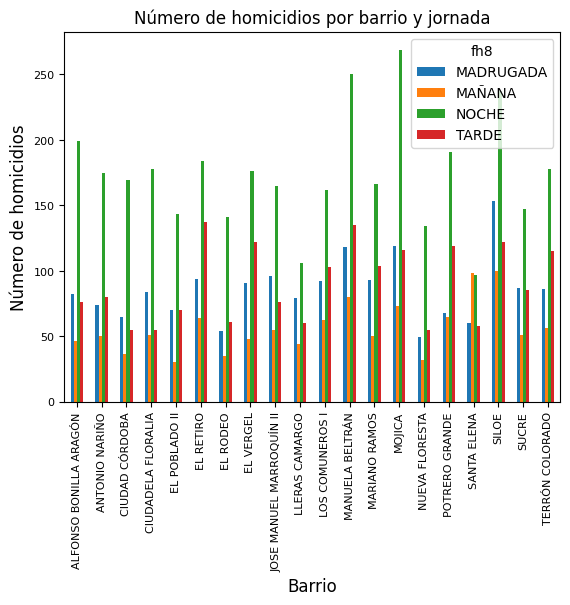

In [13]:
a = pd.crosstab(df_filtrado['barrio'], df_filtrado['fh8'])
plt.figure(figsize=(20, 15))
a.plot(kind="bar")
# Configurar etiquetas de los ejes y título
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Número de homicidios', fontsize=12)
plt.title('Número de homicidios por barrio y jornada', fontsize=12)

# Configurar el tamaño de las etiquetas en los ejes
plt.xticks(fontsize=8, rotation=90)  # Tamaño y rotación de etiquetas en el eje x
plt.yticks(fontsize=8)  # Tamaño de etiquetas en el eje y
plt.show()

Podemos observar que en los barrios la mayoría de homicidios ocurren en la noche. Una jornada en la cual se podrían tomar medidas de iluminación en las calles, adecuamiento de los lugares y presencia constante de diferentes actores sociales como lo son: habitantes del sector o policía, los cuales ocupen los espcios y no permitan el establecimiento de grupos delincuenciales.

In [29]:
#Contrastar el tipo de arma usada en los homicidios contra los días de la semana
pd.crosstab(df['diasem'], df['tipo_de_arma'], margins=True)

tipo_de_arma,ARMA DE FUEGO,CORTOPUNZANTE,OTRAS ARMAS,All
diasem,,,,
DOMINGO,4960,1007,131,6098
JUEVES,2953,327,103,3383
LUNES,2954,456,129,3539
MARTES,2922,377,106,3405
MIERCOLES,2911,341,90,3342
SABADO,3630,512,109,4251
VIERNES,3144,395,112,3651
All,23474,3415,780,27669


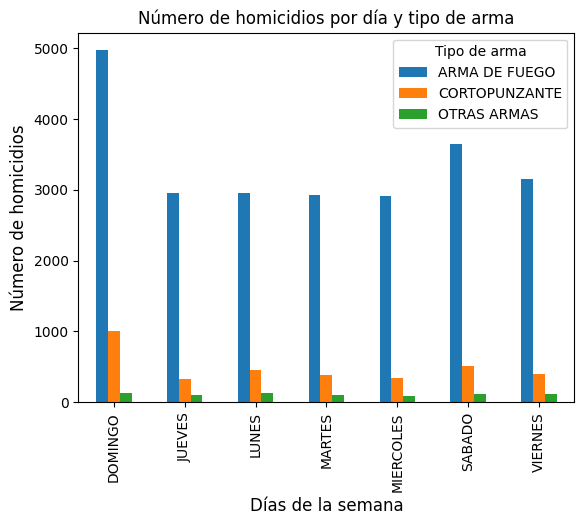

In [15]:
a = pd.crosstab(df['diasem'], df['tipo_de_arma'])
a.plot(kind="bar")

# Configurar el nombre de la leyenda
plt.legend(title='Tipo de arma')

# Configurar etiquetas de los ejes y título
plt.xlabel('Días de la semana', fontsize=12)
plt.ylabel('Número de homicidios', fontsize=12)
plt.title('Número de homicidios por día y tipo de arma', fontsize=12)

plt.show()

Como lo hablamos anteriormente, el uso de armas de fuego en los homicidios es avallazador, pero también hay una cierta presencia de armas blancas en los homicidios. Un efecto que se da por el fácil acceso a estas.

In [30]:
# Contrastar la jornada de los homicidios contra el día de la semana
pd.crosstab(df['diasem'], df['fh8'], margins=True)

fh8,MADRUGADA,MAÑANA,NOCHE,TARDE,All
diasem,,,,,
DOMINGO,2284,937,1819,1058,6098
JUEVES,443,508,1558,874,3383
LUNES,762,467,1483,827,3539
MARTES,398,525,1598,884,3405
MIERCOLES,362,474,1580,926,3342
SABADO,792,518,2001,940,4251
VIERNES,495,562,1726,868,3651
All,5536,3991,11765,6377,27669


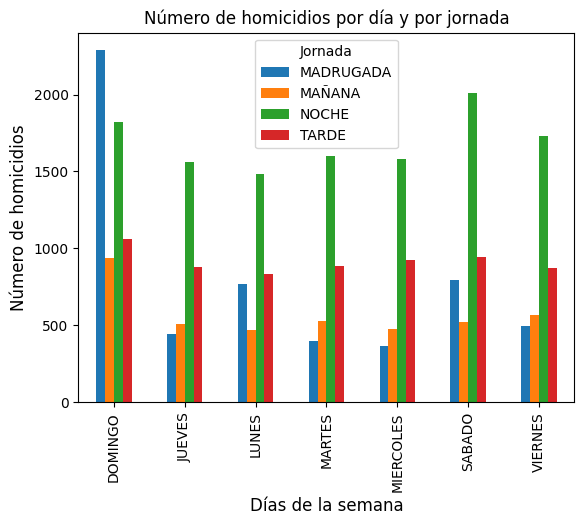

In [16]:
a = pd.crosstab(df['diasem'], df['fh8'])
a.plot(kind="bar")

# Configurar el nombre de la leyenda
plt.legend(title='Jornada')

# Configurar etiquetas de los ejes y título
plt.xlabel('Días de la semana', fontsize=12)
plt.ylabel('Número de homicidios', fontsize=12)
plt.title('Número de homicidios por día y por jornada', fontsize=12)

plt.show()

Podemos observar que la mayoría de homicidios en el día domingo se da en horas de la madruga. Un fenómeno social que se da posiblemente a que estas horas constituyen, en una sociedad como Cali, un momento en el cual las personas están saliendo de discotecas, alicoradas, y por la tanto puede que la configuración de estas carácteristicas lleven al aumento de la tasa de homicidios tanpo por delincuencia como por convivencia. También podemo observar este mismo fenónomeno pero en la noche a lo largo de todos los días sobretodo en los sabados y viernes.

In [19]:
# Contrastar la jornada de los homicidios contra el día de la semana
pd.crosstab(df['diasem'], df['tipo_violencia'], margins=True)

tipo_violencia,CONVIVENCIA,DELINCUENCIA,OTRO,All
diasem,,,,
DOMINGO,1964,2731,1414,6109
JUEVES,808,1913,670,3391
LUNES,945,1856,749,3550
MARTES,773,1992,652,3417
MIERCOLES,733,1944,676,3353
SABADO,1015,2289,964,4268
VIERNES,803,2069,791,3663
All,7041,14794,5916,27751


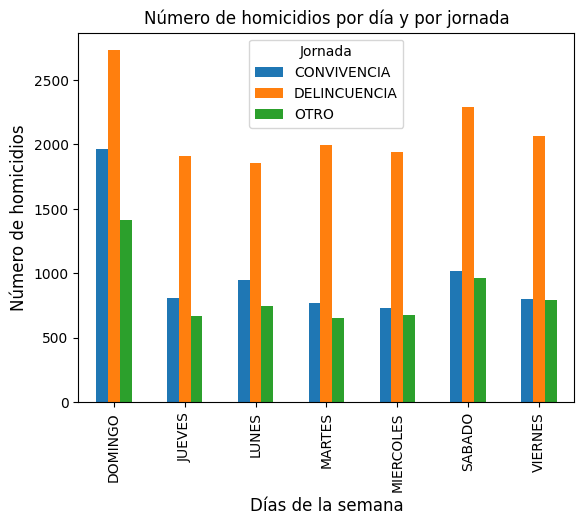

In [20]:
a = pd.crosstab(df['diasem'], df['tipo_violencia'])
a.plot(kind="bar")

# Configurar el nombre de la leyenda
plt.legend(title='Jornada')

# Configurar etiquetas de los ejes y título
plt.xlabel('Días de la semana', fontsize=12)
plt.ylabel('Número de homicidios', fontsize=12)
plt.title('Número de homicidios por día y por jornada', fontsize=12)

plt.show()

Como lo hemos venido planteando, la mayor incidencia de los homicidios es causada por la delincuencia, pero a su vez, la convivencia también tiene una gran repercusión sobretodo en el día domingo.

In [7]:
#Contrastar el tipo de violencia en los homicidios contra el arma empleada
pd.crosstab(df['tipo_violencia'], df['tipo_de_arma'], margins=True)

tipo_de_arma,ARMA DE FUEGO,CORTOPUNZANTE,OTRAS ARMAS,All
tipo_violencia,,,,
CONVIVENCIA,4962,1900,179,7041
DELINCUENCIA,13866,719,209,14794
OTRO,4708,805,403,5916
All,23536,3424,791,27751


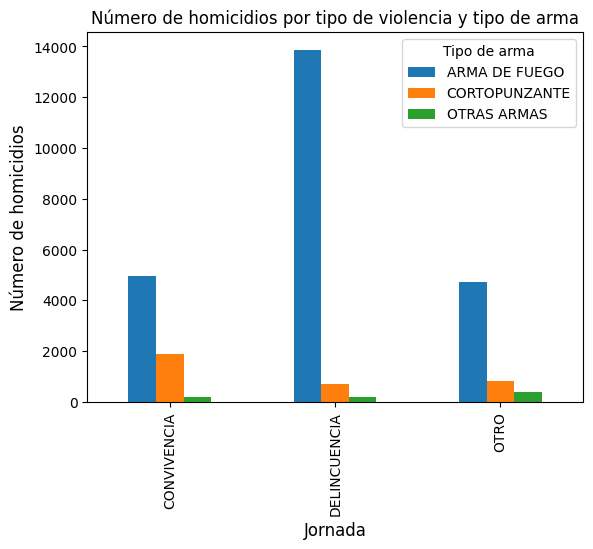

In [8]:
a = pd.crosstab(df['tipo_violencia'], df['tipo_de_arma'])
a.plot(kind="bar")
# Configurar el nombre de la leyenda
plt.legend(title='Tipo de arma')

# Configurar etiquetas de los ejes y título
plt.xlabel('Jornada', fontsize=12)
plt.ylabel('Número de homicidios', fontsize=12)
plt.title('Número de homicidios por tipo de violencia y tipo de arma', fontsize=12)

plt.show()

Por último, observamos que en cualquiera de las causas de homicidio, el objeto que más está presente son las armas de fuego.

# Conclusiones

Historicamente, Cali ha sido una ciudad que desde los años 70 con la sustitución de importaciones ha atraído a distintas personas de todas partes de Colombia en busca de mejores oportunidades debido a la facilidad del empleo que la industrialización en esos tiempos presentaba. Esto dio paso a que muchas personas desplazadas por la violencia tuvieran que llegar a Cali y asentarse donde pudieran, abriendo paso a la configuración de invasiones y futuros barrios, pero también a la segregación racial, división de clases e inconsistencia al acceso de oportuniades para muchos.

Lo anterior tuvo y tiene efectos sobre la sociedad caleña, los cuales los vemos reflejados hoy en día. La delincuencia y la convivencia han empeorado notablemente. Como lo vemos reflejado en los datos, Cali se ha convertido en una socidad altamente peligrosa, permeada por la desigualdad, pobreza, falta de oportunidades y abandono del estado.

El análisis anterior es un llamado a que hay que tomar medidas urgentes que no solo se centren en solucinar una parte del problema. Estás medidas tienen que ser integradas y articuladas en pro de darle una oportunidad a esa sociedad que ha sido historicamente maltratada.

Los datos nos permiten ver que politicas de género, políticas juveniles, políticas de convivencia y políticas de extracción de armas puede ser un buen primer paso para comenzar a disminuir los homicidios.

También es pertinente recordar que entre el periodo de 2014 a 2020 hubo una disminución considerable de los homicidios. Sería relevante investigar y analizar que medidas o fenómenos ocurrieron en esa época para que se haya presentado esa disminución.

